## Import Libraries 

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Import Datasets

In [137]:
train_data = pd.read_csv('Train.csv')

test_data = pd.read_csv('Test.csv')

In [138]:
train_data.head(3)

ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  462809    Male           No   22        No  Healthcare              1.0   
1  462643  Female          Yes   38       Yes    Engineer              NaN   
2  466315  Female          Yes   67       Yes    Engineer              1.0   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B

In [86]:
test_data.head(3)

ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6

## Number of Rows & Columns

In [87]:
train_data.shape , test_data.shape

((8068, 11), (2627, 10))

## Removing Unnecessary Columns from Datasets

In [88]:
train_data.drop(columns = ['ID'] , inplace=True)

test_data.drop(columns = ['ID'] , inplace=True)

# Implement Train Data

## Checking for Missing Values

In [89]:
train_data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

## Identifying Numeric Columns

In [90]:
num_miss_vars = train_data.select_dtypes(["int64" , "float64"]).columns

num_miss_vars

Index(['Age', 'Work_Experience', 'Family_Size'], dtype='object')

In [91]:
train_data[num_miss_vars].isnull().sum()

Age                  0
Work_Experience    829
Family_Size        335
dtype: int64

## Filling Missing Values in Numerical Columns with Mean

In [92]:
numerical_columns = ['Work_Experience', 'Family_Size']
for col in numerical_columns:
    if train_data[col].isnull().sum() > 0:
        train_data[col].fillna(train_data[col].mean(), inplace=True)

In [93]:
train_data[num_miss_vars].isnull().sum()

Age                0
Work_Experience    0
Family_Size        0
dtype: int64

## Identifying Categorical Columns

In [94]:
cat_miss_vars = train_data.select_dtypes(["O"]).columns

cat_miss_vars

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')

In [95]:
train_data[cat_miss_vars].isnull().sum()

Gender              0
Ever_Married      140
Graduated          78
Profession        124
Spending_Score      0
Var_1              76
Segmentation        0
dtype: int64

## Filling Missing Values in Categorical Columns with Mode

In [96]:
catgorical_columns = ["Ever_Married" , "Graduated" , "Profession" , "Var_1"]
for col in catgorical_columns:
    if train_data[col].isnull().sum() > 0:
        train_data[col].fillna(train_data[col].mode()[0], inplace=True)

In [97]:
train_data[cat_miss_vars].isnull().sum()

Gender            0
Ever_Married      0
Graduated         0
Profession        0
Spending_Score    0
Var_1             0
Segmentation      0
dtype: int64

In [98]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     8068 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   object 
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


## Encoding Categorical Column

In [99]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

train_data['Gender'] = LE.fit_transform(train_data['Gender'])

In [100]:
train_data['Ever_Married'].value_counts()

train_data['Ever_Married'] = LE.fit_transform(train_data['Ever_Married'])

In [101]:
train_data['Graduated'].value_counts()

train_data['Graduated'] = LE.fit_transform(train_data['Graduated'])

In [102]:
train_data['Profession'].value_counts()

train_data['Profession'] = LE.fit_transform(train_data['Profession'])

In [103]:
train_data['Spending_Score'].value_counts()

train_data['Spending_Score'] = LE.fit_transform(train_data['Spending_Score'])

In [104]:
train_data['Var_1'].value_counts()

train_data['Var_1'] = LE.fit_transform(train_data['Var_1'])

In [105]:
train_data['Segmentation'].value_counts()

train_data['Segmentation'] = LE.fit_transform(train_data['Segmentation'])

In [106]:
train_data.head(3)

Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0       1             0   22          0           5         1.000000   
1       0             1   38          1           2         2.641663   
2       0             1   67          1           2         1.000000   

   Spending_Score  Family_Size  Var_1  Segmentation  
0               2          4.0      3             3  
1               0          3.0      3             0  
2               2          1.0      5             1

## Drop Duplicate Columns

In [107]:
train_data.duplicated().sum()

434

In [108]:
train_data = train_data.drop_duplicates(keep='last')

In [109]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   object 
 1   Ever_Married     2577 non-null   object 
 2   Age              2627 non-null   int64  
 3   Graduated        2603 non-null   object 
 4   Profession       2589 non-null   object 
 5   Work_Experience  2358 non-null   float64
 6   Spending_Score   2627 non-null   object 
 7   Family_Size      2514 non-null   float64
 8   Var_1            2595 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 184.8+ KB


# Test_Data Implement

## Identifying Numeric Columns

In [110]:
num_miss_vars = test_data.select_dtypes(["int64" , "float64"]).columns

num_miss_vars

Index(['Age', 'Work_Experience', 'Family_Size'], dtype='object')

In [111]:
test_data[num_miss_vars].isnull().sum()

Age                  0
Work_Experience    269
Family_Size        113
dtype: int64

## Filling Missing Values in Numerical Columns with Mean

In [112]:
numerical_columns = ['Work_Experience', 'Family_Size']
for col in numerical_columns:
    if test_data[col].isnull().sum() > 0:
        test_data[col].fillna(test_data[col].mean(), inplace=True)

In [113]:
test_data[num_miss_vars].isnull().sum()

Age                0
Work_Experience    0
Family_Size        0
dtype: int64

## Identifying Categorical Columns

In [114]:
cat_miss_vars = test_data.select_dtypes(["O"]).columns

cat_miss_vars

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')

In [115]:
test_data[cat_miss_vars].isnull().sum()

Gender             0
Ever_Married      50
Graduated         24
Profession        38
Spending_Score     0
Var_1             32
dtype: int64

## Filling Missing Values in Categorical Columns with Mode

In [116]:
catgorical_columns = ["Ever_Married" , "Graduated" , "Profession" , "Var_1"]
for col in catgorical_columns:
    if test_data[col].isnull().sum() > 0:
        test_data[col].fillna(test_data[col].mode()[0], inplace=True)

In [117]:
test_data[cat_miss_vars].isnull().sum()

Gender            0
Ever_Married      0
Graduated         0
Profession        0
Spending_Score    0
Var_1             0
dtype: int64

## Encoding Categorical Column

In [118]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

test_data['Gender'] = LE.fit_transform(test_data['Gender'])

In [119]:
test_data['Ever_Married'].value_counts()

test_data['Ever_Married'] = LE.fit_transform(test_data['Ever_Married'])

In [120]:
test_data['Graduated'].value_counts()

test_data['Graduated'] = LE.fit_transform(test_data['Graduated'])

In [121]:
test_data['Profession'].value_counts()

test_data['Profession'] = LE.fit_transform(test_data['Profession'])

In [122]:
test_data['Spending_Score'].value_counts()

test_data['Spending_Score'] = LE.fit_transform(test_data['Spending_Score'])

In [123]:
test_data['Var_1'].value_counts()

test_data['Var_1'] = LE.fit_transform(test_data['Var_1'])

In [124]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   int32  
 1   Ever_Married     2627 non-null   int32  
 2   Age              2627 non-null   int64  
 3   Graduated        2627 non-null   int32  
 4   Profession       2627 non-null   int32  
 5   Work_Experience  2627 non-null   float64
 6   Spending_Score   2627 non-null   int32  
 7   Family_Size      2627 non-null   float64
 8   Var_1            2627 non-null   int32  
dtypes: float64(2), int32(6), int64(1)
memory usage: 123.3 KB


## Drop Duplicate Value

In [125]:
test_data.duplicated().sum()

81

In [126]:
test_data = test_data.drop_duplicates(keep = "last")

In [127]:
test_data.duplicated().sum()

0

## Concatenating Train and Test DataFrames

In [128]:
combine_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

## Drop Duplicate Value

In [129]:
combine_data.duplicated().sum()

0

In [130]:
combine_data = combine_data.drop_duplicates(keep='last')

In [131]:
combine_data.duplicated().sum()

0

## Check Missing Value

In [132]:
combine_data.isnull().sum()

Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2546
dtype: int64

## Fill Missing value

In [133]:
combine_data['Segmentation'] = combine_data['Segmentation'].fillna(combine_data['Segmentation'].mean())

## Pair Plot

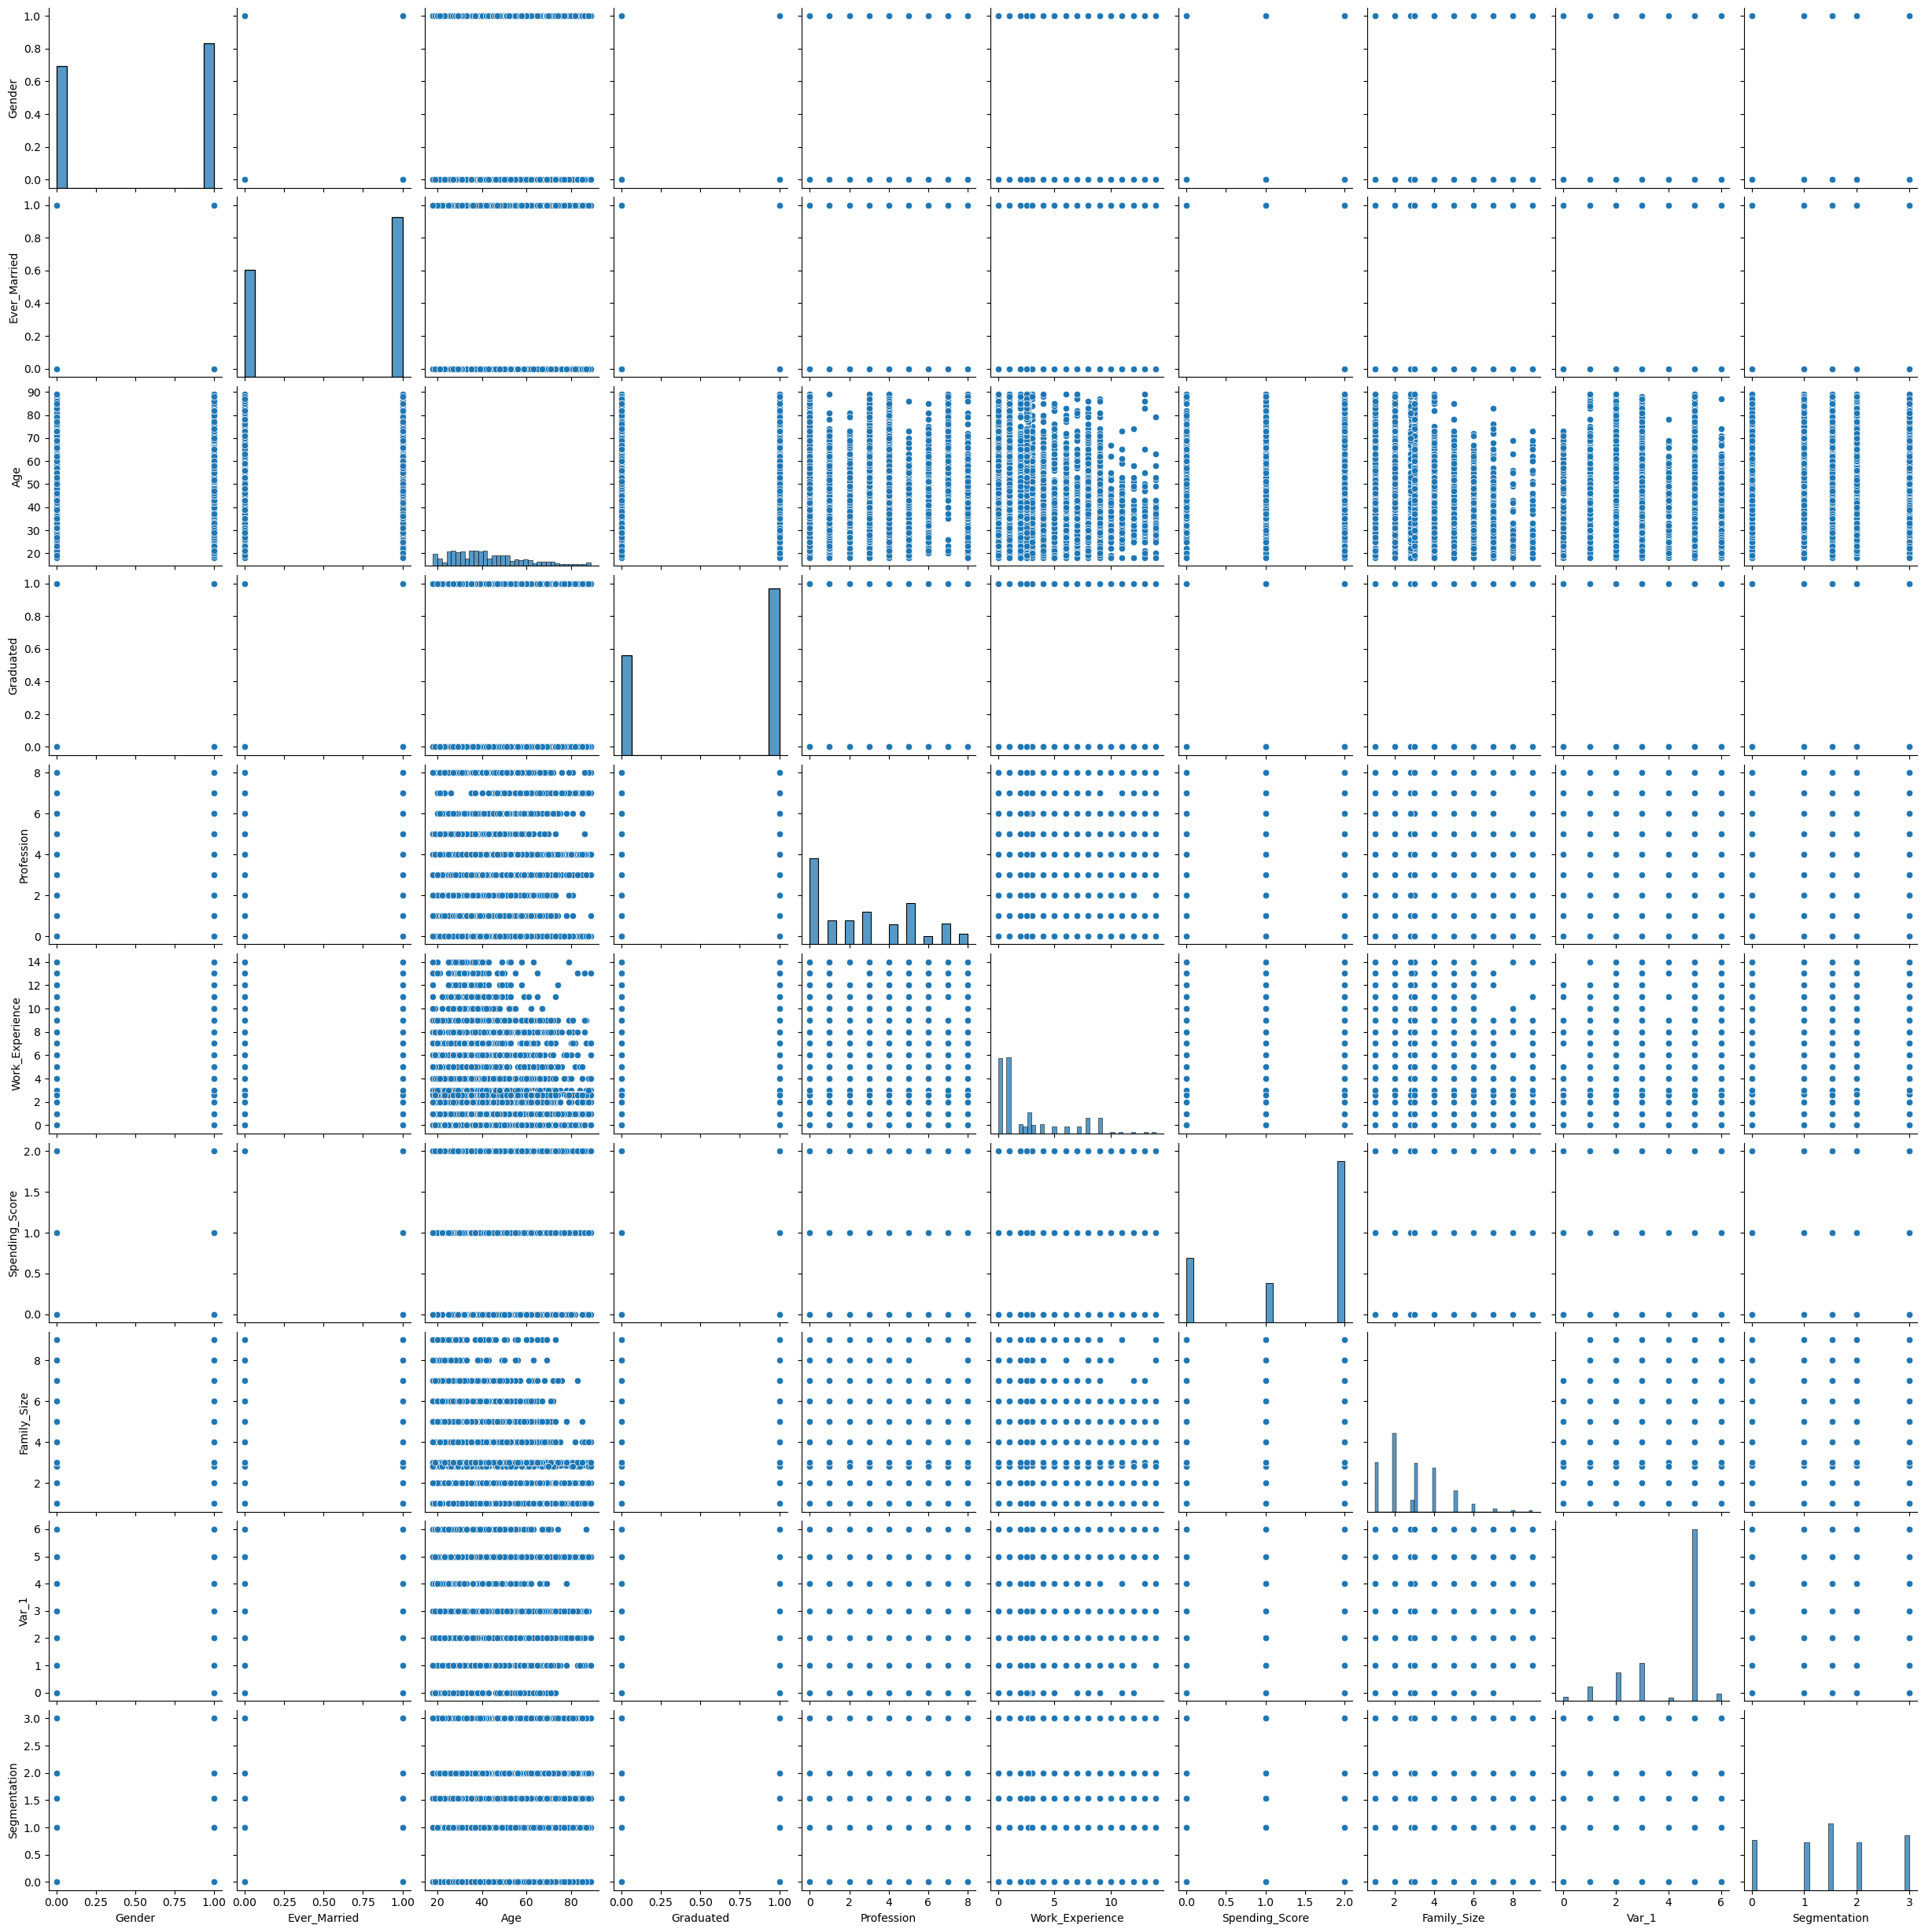

In [134]:
sns.pairplot(combine_data , palette='plasma')
plt.show()

In [135]:
combine_data.head(3)

Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0       0             1   38          1           2         2.641663   
1       0             1   67          1           2         1.000000   
2       1             1   67          1           7         0.000000   

   Spending_Score  Family_Size  Var_1  Segmentation  
0               0          3.0      3           0.0  
1               2          1.0      5           1.0  
2               1          2.0      5           1.0

## Calculating Within-Cluster Sum of Squares (WCSS) for KMeans Clustering

In [53]:
from sklearn.cluster import KMeans

In [54]:
wcss = []

for i in range (2,21):
    km = KMeans( n_clusters=i , init='k-means++')
    km.fit(combine_data)
    wcss.append(km.inertia_)

## Plotting Elbow Curve to Determine Optimal Number of Clusters

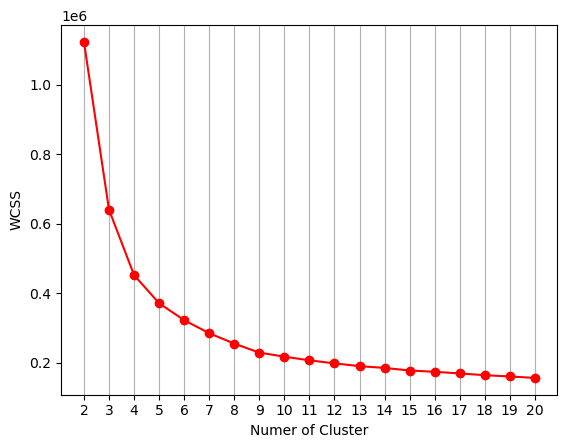

In [60]:
plt.plot([i for i in range(2,21)] , wcss , marker="o" , color='red')
plt.xlabel("Numer of Cluster")
plt.xticks([i for i in range (2,21)])
plt.ylabel("WCSS")
plt.grid(axis = "x")
plt.show()

## Applying KMeans Clustering

In [61]:
Combine_KM = KMeans(n_clusters=3)

combine_data["Predict"] = Combine_KM.fit_predict(combine_data)

## Visualizing Clusters using Pair Plot

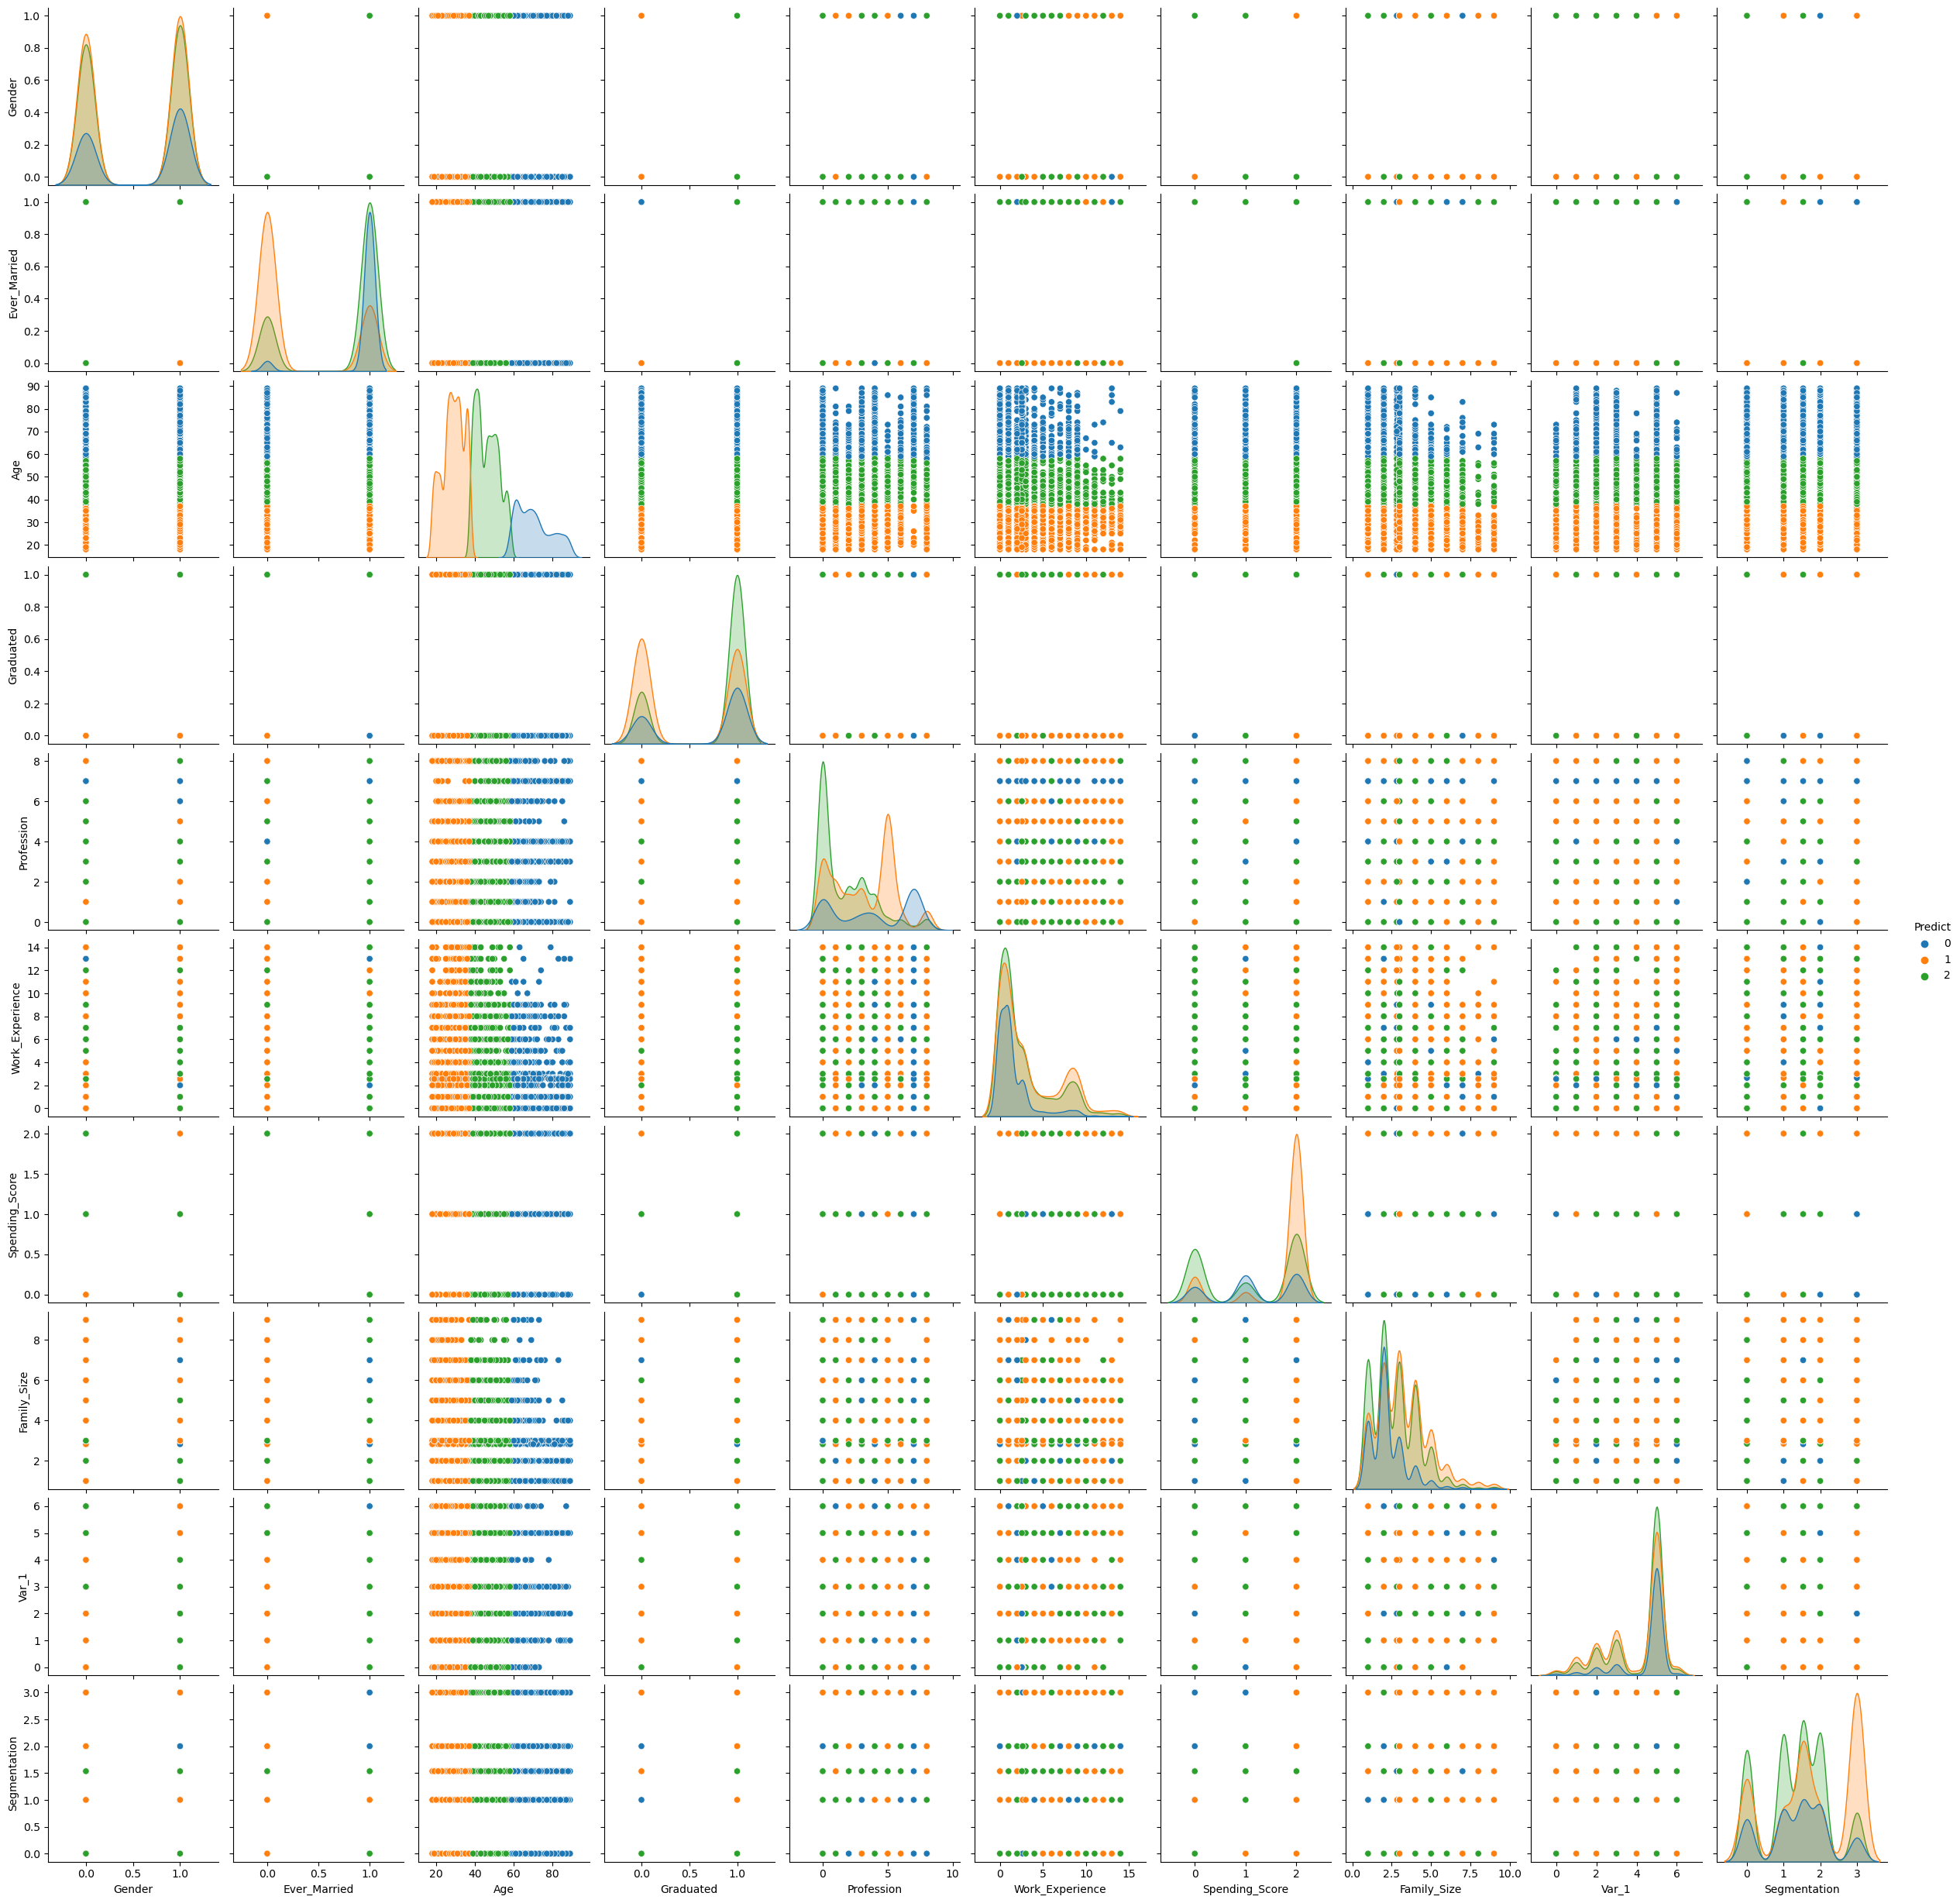

In [62]:
custom_palette = {0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c"} 

sns.pairplot(data=combine_data ,  hue="Predict", palette=custom_palette)
plt.show()

# Separately Visualization Test Data

## Calculating Within-Cluster Sum of Squares (WCSS) for KMeans Clustering

In [63]:
wcss = []

for i in range (2,21):
    km = KMeans( n_clusters=i , init='k-means++')
    km.fit(test_data)
    wcss.append(km.inertia_)

## Plotting Elbow Curve to Determine Optimal Number of Clusters

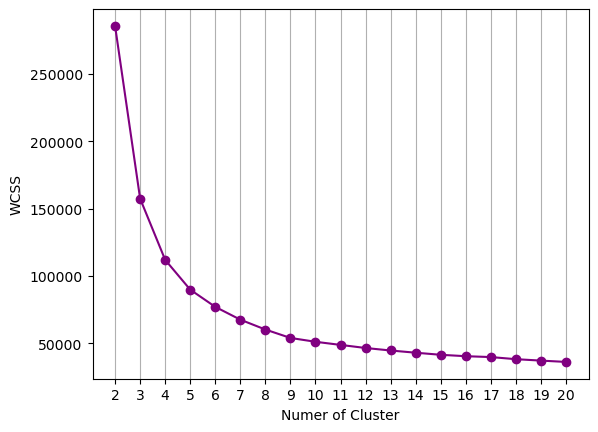

In [64]:
plt.plot([i for i in range(2,21)] , wcss , marker="o" , color='purple')
plt.xlabel("Numer of Cluster")
plt.xticks([i for i in range (2,21)])
plt.ylabel("WCSS")
plt.grid(axis = "x")
plt.show()

## Applying KMeans Clustering

In [65]:
Test_KM = KMeans(n_clusters=3)

test_data["Predict"] = Test_KM.fit_predict(test_data)

## Visualizing Clusters using Pairplot

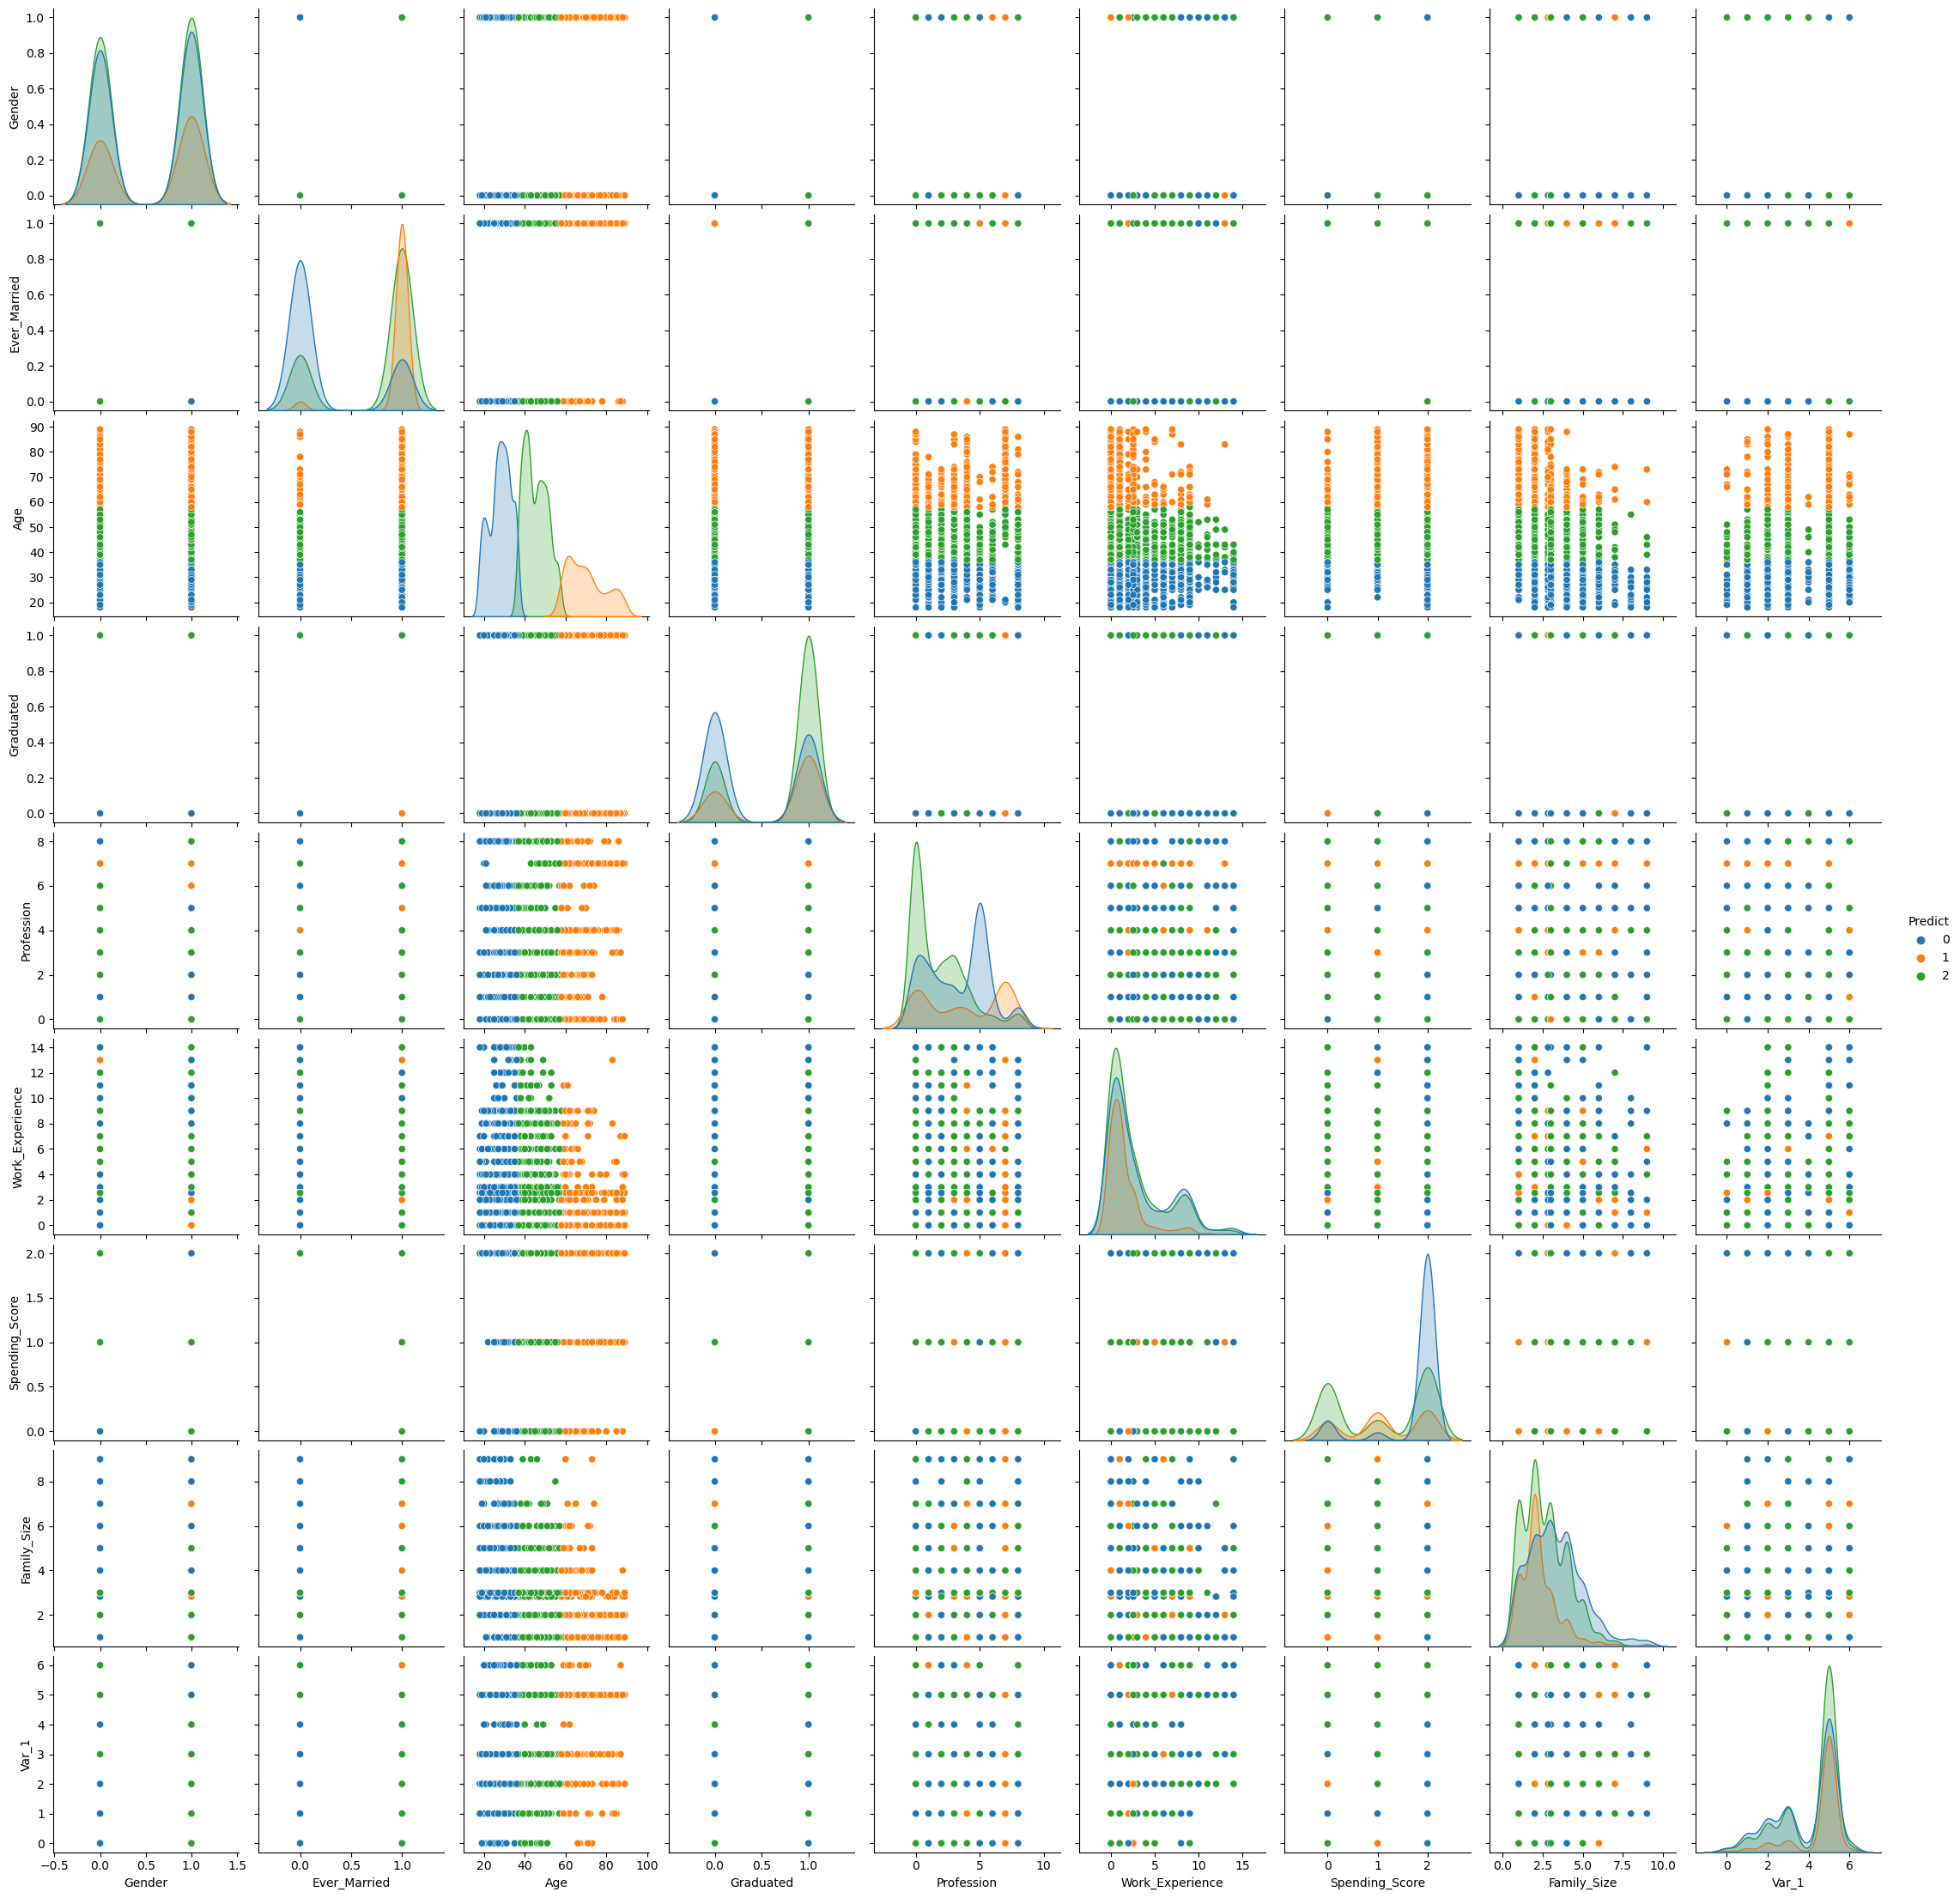

In [66]:
custom_palette = {0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c"} 

sns.pairplot(data=test_data ,  hue="Predict" , palette=custom_palette)

plt.show()

## Train Data Visualization

## Calculating Within-Cluster Sum of Squares (WCSS) for KMeans Clustering

In [67]:
wcss = []

for i in range (2,21):
    km = KMeans( n_clusters=i , init='k-means++')
    km.fit(train_data)
    wcss.append(km.inertia_)

## Plotting Elbow Curve to Determine Optimal Number of Clusters

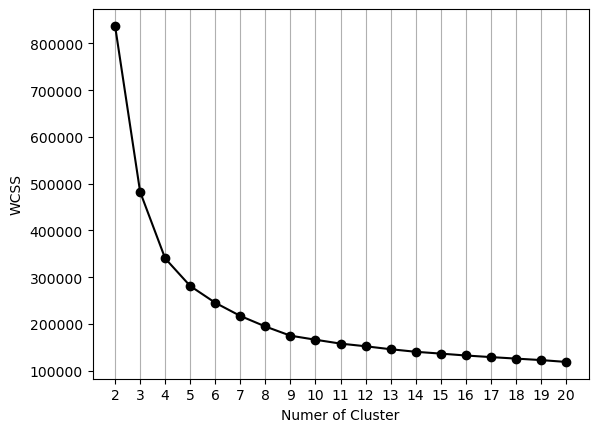

In [78]:
plt.plot([i for i in range(2,21)] , wcss , marker="o" , color='black')
plt.xlabel("Numer of Cluster")
plt.xticks([i for i in range (2,21)])
plt.ylabel("WCSS")
plt.grid(axis = "x")
plt.show()

## Applying KMeans Clustering

In [69]:
Train_KM = KMeans(n_clusters=3)

train_data["Predict"] = Train_KM.fit_predict(train_data)

## Applying KMeans Clustering using Pairplot

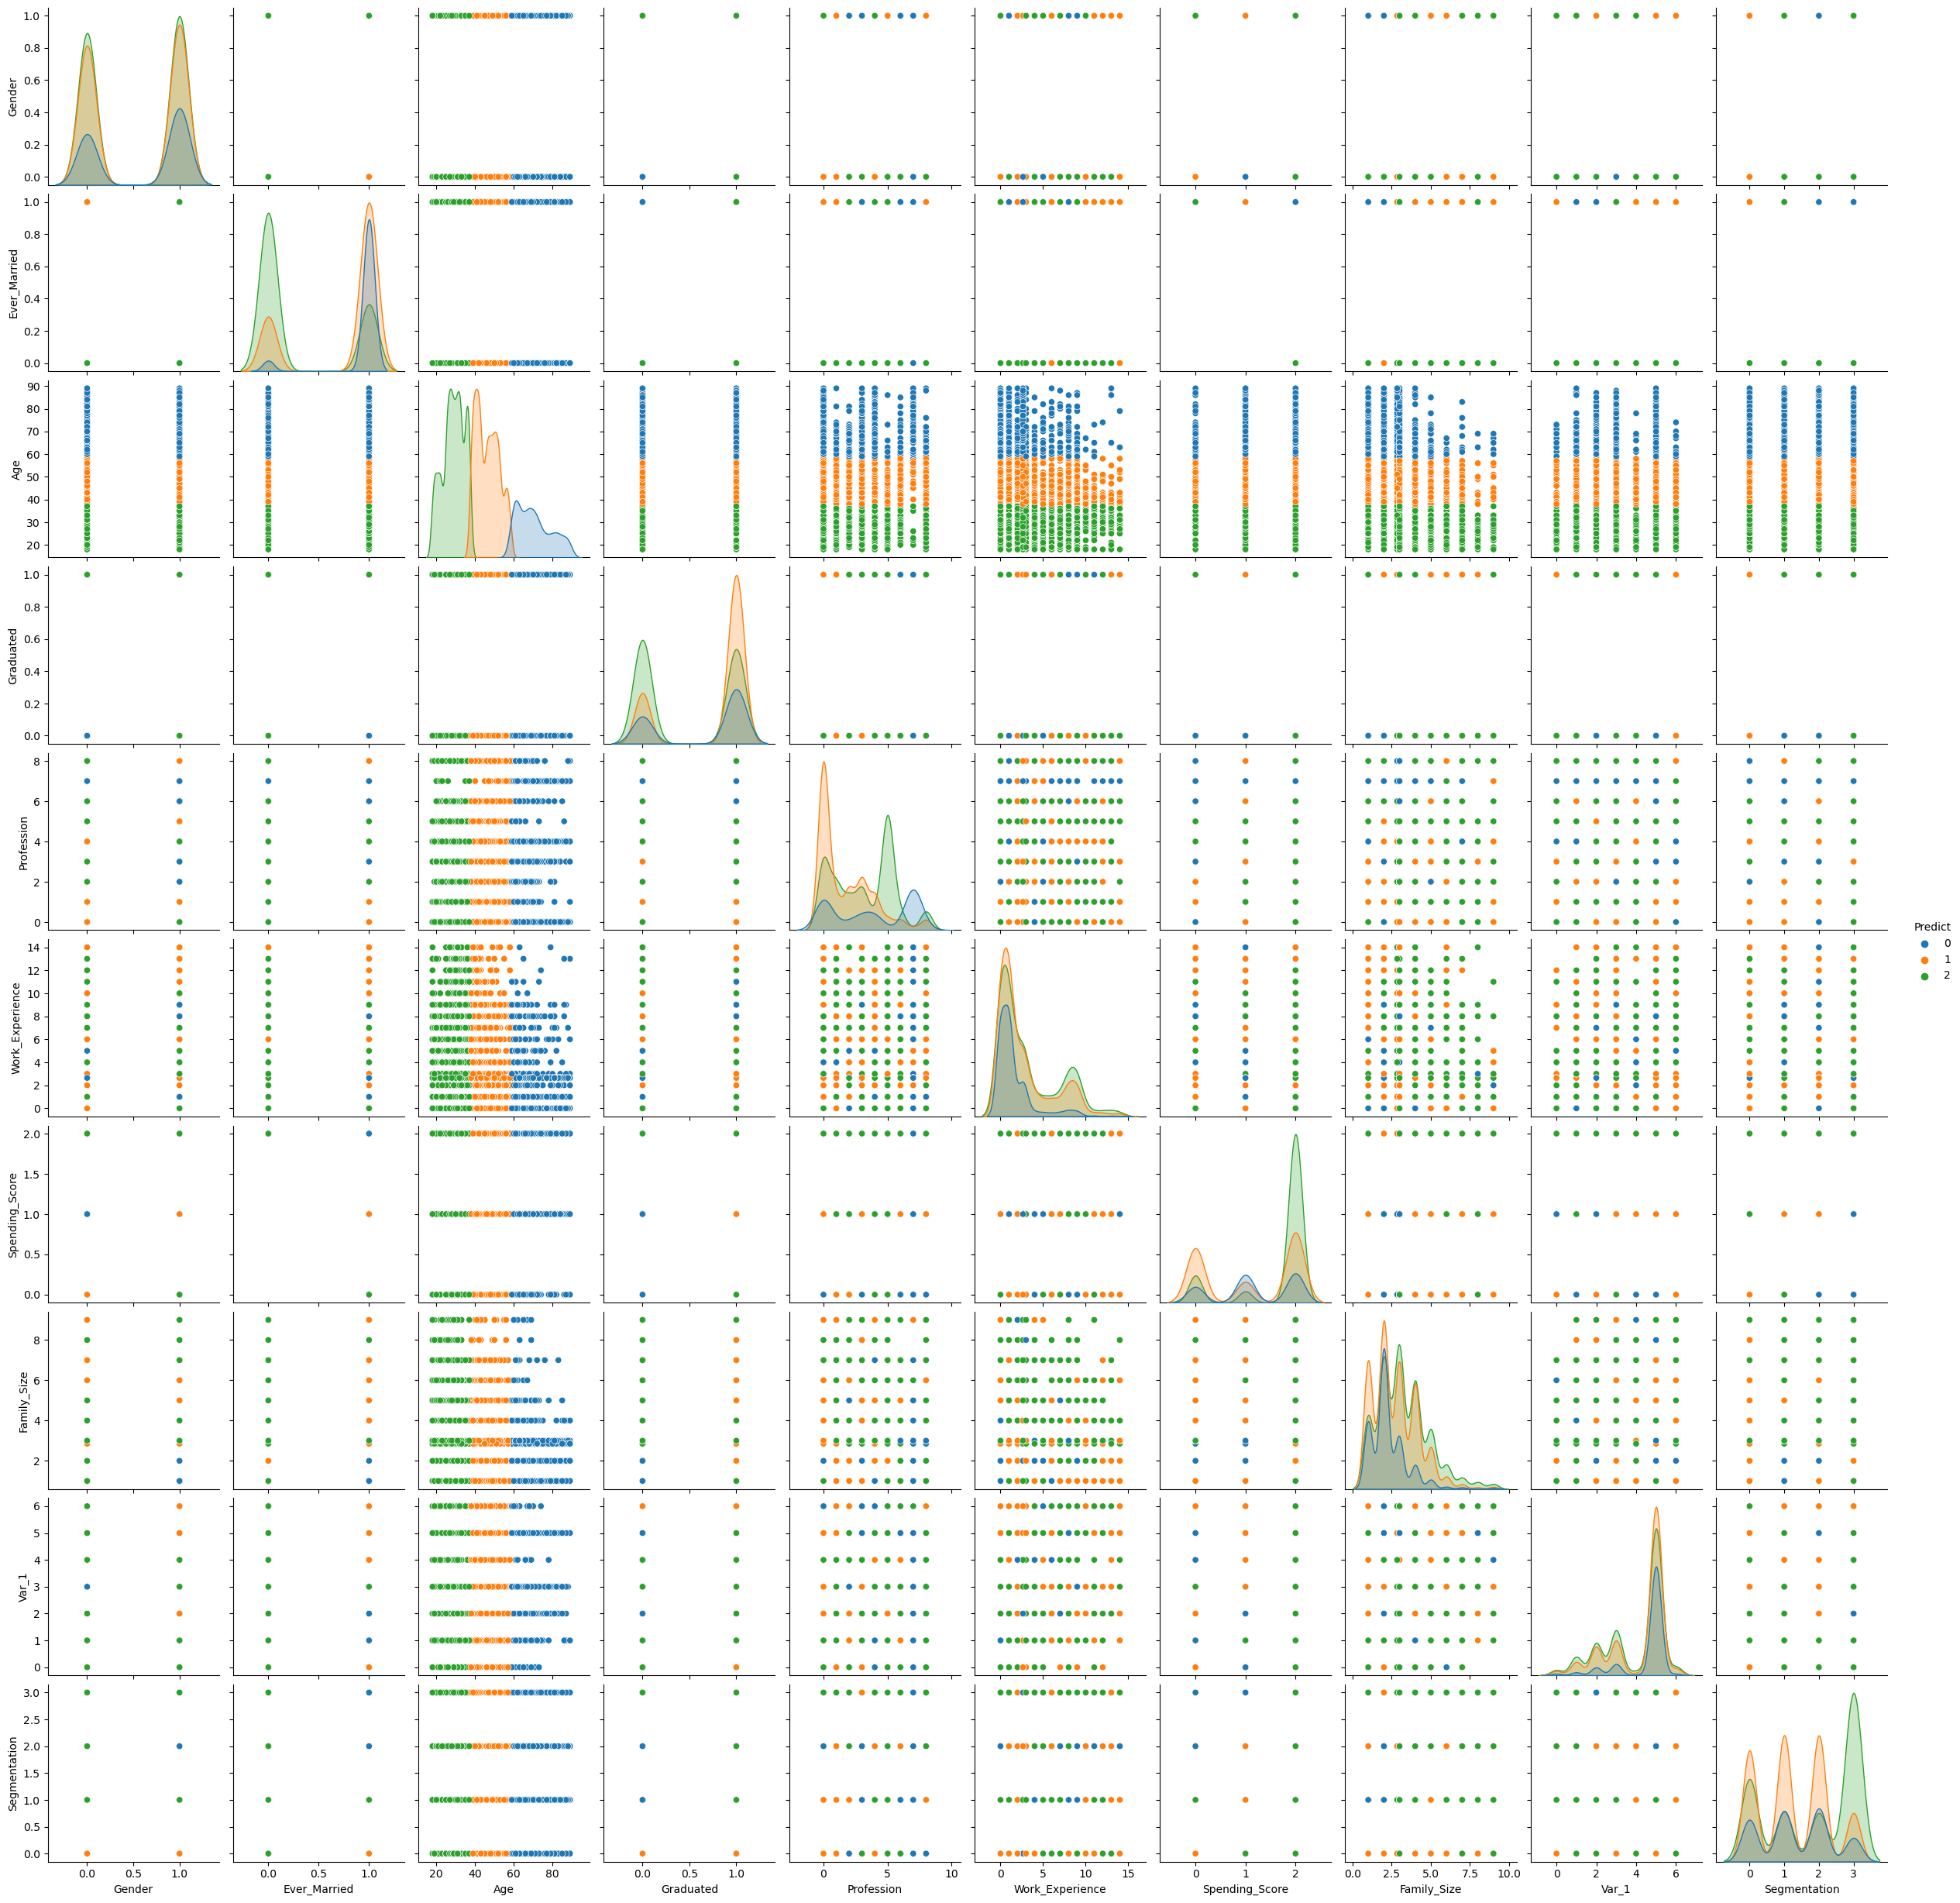

In [70]:
custom_palette = {0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c"} 

sns.pairplot(data=train_data ,  hue="Predict" , palette=custom_palette)

plt.show()

## Best Cluster Model Finding of combine_data

In [71]:
Combine_KM.labels_

array([2, 0, 0, ..., 2, 2, 2])

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
silhouette_score(combine_data , labels=Combine_KM.labels_)

0.44126859973477783

## Calculating Silhouette Scores for Different Numbers of Clusters

In [74]:
ss = []
no_c = [j for j in range(2,21)]
for i in range(2,21):
    km1 = KMeans(n_clusters=i)
    km1.fit(combine_data)
    ss.append(silhouette_score(combine_data , km1.labels_))

## Plotting Silhouette Scores for Various Numbers of Clusters

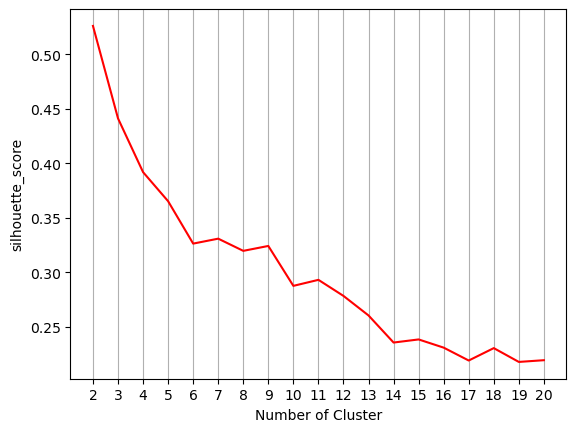

In [77]:
plt.plot(no_c , ss , color = 'red')
plt.xlabel("Number of Cluster")
plt.ylabel("silhouette_score")
plt.xticks(no_c)
plt.grid(axis="x")
plt.show()

# **Thank YOU ! Please Follow My GitHub Account** *@ZeshanFareed*